# Inventory Management

## Business Objective:

Poor inventory management leads to a loss in sales which in turn paints an inaccurate picture of lower demand for certain items, making future order predictions based on that past data inherently inaccurate. Instead, smart retailers use real-time data to move inventory where it’s needed before it’s too late. Additionally, they use predictive analytics to decide what to stock and where based on data about regional differences in preferences, weather, etc


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
data1 = pd.read_csv('prorevenue.csv')
data2 = pd.read_csv('productdetails.csv')

In [4]:
data1.head()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [5]:
data2.head()

,Unnamed: 0,product type,cost per unit,Time for delivery
0,0,1,457,11
1,1,2,1545,13
2,2,3,1910,14
3,3,4,131,9
4,4,5,868,8


In [6]:
data2.drop(['Unnamed: 0'],inplace=True,axis=1)
data2.head()

,product type,cost per unit,Time for delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [7]:
data1.rename(columns={'Product type':'product_type','No of purchases':'no_of_purchases','store status':'store-status','Promotion applied':'promotion_applied','Generic Holiday':'generic_holiday','Education Holiday':'education_holiday','DayOfWeek':'day_of_week'},inplace=True)
data1.head()


,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [8]:
data2.rename(columns={'product type':'product_type','cost per unit':'cost_per_unit','Time for delivery':'time_of_delivery'},inplace=True)
data2.head()


,product_type,cost_per_unit,time_of_delivery
0,1,457,11
1,2,1545,13
2,3,1910,14
3,4,131,9
4,5,868,8


In [9]:
data=pd.merge(data1,data2,on='product_type',how='right')
data.head(10)

,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery
0,1,14190,890,open,1,0,1,5,457,11
1,1,5020,546,open,1,0,1,4,457,11
2,1,4782,523,open,1,0,1,3,457,11
3,1,5011,560,open,1,0,1,2,457,11
4,1,6102,612,open,1,0,1,1,457,11
5,1,0,0,close,0,0,0,7,457,11
6,1,4364,500,open,0,0,0,6,457,11
7,1,3706,459,open,0,0,0,5,457,11
8,1,3769,503,open,0,0,0,4,457,11
9,1,3464,463,open,0,0,0,3,457,11


In [10]:
data.shape

(1017209, 10)

In [11]:
data.sample(10)

,product_type,Revenue,no_of_purchases,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery
185289,205,5915,874,open,0,0,1,5,926,5
870430,955,2578,330,open,0,0,0,4,1625,5
653526,718,8629,871,open,1,0,1,3,962,5
870286,955,6862,566,open,1,0,0,1,1625,5
741645,814,11118,840,open,1,0,0,1,1933,14
854024,938,13498,1256,open,1,0,0,1,196,9
95272,105,5993,651,open,1,0,0,2,1949,14
771660,847,0,0,close,0,0,0,7,669,5
216761,239,5436,493,open,1,0,0,2,1749,6
451788,495,0,0,close,1,a,1,4,1243,6


In [12]:
data.columns

Index(['product_type', 'Revenue', 'no_of_purchases', 'store-status',
       'promotion_applied', 'generic_holiday', 'education_holiday',
       'day_of_week', 'cost_per_unit', 'time_of_delivery'],
      dtype='object')

No. of Purchases column is removed as it is irrelevant in the dataset

In [13]:
data.drop(['no_of_purchases'],inplace=True,axis=1)
data.columns

Index(['product_type', 'Revenue', 'store-status', 'promotion_applied',
       'generic_holiday', 'education_holiday', 'day_of_week', 'cost_per_unit',
       'time_of_delivery'],
      dtype='object')

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_type,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
Revenue,1017209.0,5773.832433,3849.953591,0.0,3727.0,5744.0,7856.0,41551.0
promotion_applied,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
education_holiday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
day_of_week,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
cost_per_unit,1017209.0,1012.841002,565.501611,50.0,502.0,1023.0,1519.0,1999.0
time_of_delivery,1017209.0,9.543625,2.857043,5.0,7.0,10.0,12.0,14.0


In [15]:
data.dtypes

product_type          int64
Revenue               int64
store-status         object
promotion_applied     int64
generic_holiday      object
education_holiday     int64
day_of_week           int64
cost_per_unit         int64
time_of_delivery      int64
dtype: object

In [16]:
data.nunique()

product_type          1115
Revenue              21734
store-status             2
promotion_applied        2
generic_holiday          5
education_holiday        2
day_of_week              7
cost_per_unit          863
time_of_delivery        10
dtype: int64

In [17]:
data.isnull().sum()

product_type         0
Revenue              0
store-status         0
promotion_applied    0
generic_holiday      0
education_holiday    0
day_of_week          0
cost_per_unit        0
time_of_delivery     0
dtype: int64

In [18]:
data.product_type.value_counts()

233     942
836     942
308     942
309     942
821     942
       ... 
778     758
677     758
952     758
1065    758
512     758
Name: product_type, Length: 1115, dtype: int64

In [19]:
data.promotion_applied.value_counts()

0    629129
1    388080
Name: promotion_applied, dtype: int64

In [20]:
data.education_holiday.value_counts()

0    835488
1    181721
Name: education_holiday, dtype: int64

In [21]:
data.generic_holiday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: generic_holiday, dtype: int64

In [22]:
data['generic_holiday'] = data['generic_holiday'].replace(['a','b','c'],['1','1','1']).astype(int)
data.generic_holiday.value_counts()

0    986159
1     31050
Name: generic_holiday, dtype: int64

In [23]:
data.duplicated(keep='first').sum()


166571

<AxesSubplot:xlabel='Revenue'>

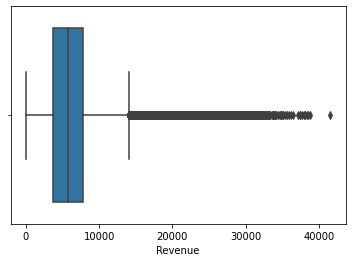

In [26]:
#Checking outliers
sns.boxplot(data=data,x=data["Revenue"])


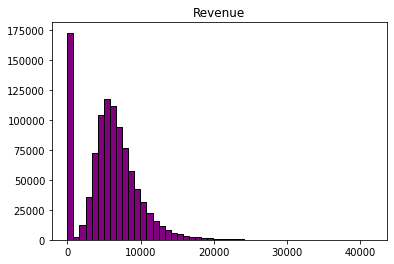

In [28]:
# Revenue Histogram
plt.hist(data.Revenue,bins=50, color='purple', edgecolor='black')
plt.title('Revenue')
plt.show()


In [29]:
# Checking Outliers using IQR
Q1=data["Revenue"].quantile(0.25)
Q3=data["Revenue"].quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print("Lower whisker=",Lower_Whisker)
print("Upper Whisker=", Upper_Whisker)


Q1= 3727.0
Q3= 7856.0
IQR= 4129.0
Lower whisker= -2466.5
Upper Whisker= 14049.5


In [31]:
# Outlier Treatment
data = data[data["Revenue"]< Upper_Whisker]


In [32]:
data.shape


(990512, 9)

<AxesSubplot:xlabel='Revenue'>

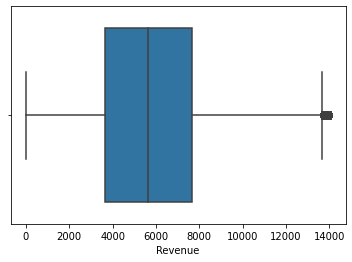

In [33]:
# Revenue data after removing outliers
sns.boxplot(data=data,x=data["Revenue"])

In [36]:
# Sales = REVENUE/COST PER UNIT 
data["sales"] = data['Revenue']/data['cost_per_unit'] 
data.head(10)

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,sales
1,1,5020,open,1,0,1,4,457,11,10.984683
2,1,4782,open,1,0,1,3,457,11,10.463895
3,1,5011,open,1,0,1,2,457,11,10.964989
4,1,6102,open,1,0,1,1,457,11,13.352298
5,1,0,close,0,0,0,7,457,11,0.000000
6,1,4364,open,0,0,0,6,457,11,9.549234
7,1,3706,open,0,0,0,5,457,11,8.109409
8,1,3769,open,0,0,0,4,457,11,8.247265
9,1,3464,open,0,0,0,3,457,11,7.579869
10,1,3558,open,0,0,0,2,457,11,7.785558


In [37]:
# Inventory = REVENUE/COST PER UNIT +10% Buffer stock
data['Inventory'] = data['sales'] + data['sales']* 0.1

In [38]:
data.head()


,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,sales,Inventory
1,1,5020,open,1,0,1,4,457,11,10.984683,12.083151
2,1,4782,open,1,0,1,3,457,11,10.463895,11.510284
3,1,5011,open,1,0,1,2,457,11,10.964989,12.061488
4,1,6102,open,1,0,1,1,457,11,13.352298,14.687527
5,1,0,close,0,0,0,7,457,11,0.000000,0.000000


In [39]:
data['store-status']= data['store-status'].replace(['open','close'],[1,0]).astype(int)

In [40]:
print(data[['sales', 'Inventory']])

             sales  Inventory
1        10.984683  12.083151
2        10.463895  11.510284
3        10.964989  12.061488
4        13.352298  14.687527
5         0.000000   0.000000
...            ...        ...
1017204  10.508811  11.559692
1017205  10.000000  11.000000
1017206   9.464758  10.411233
1017207   8.143172   8.957489
1017208   0.000000   0.000000

[990512 rows x 2 columns]


we can also drop sales column

In [41]:
data.drop(['sales'],inplace=True,axis=1)
data.columns

Index(['product_type', 'Revenue', 'store-status', 'promotion_applied',
       'generic_holiday', 'education_holiday', 'day_of_week', 'cost_per_unit',
       'time_of_delivery', 'Inventory'],
      dtype='object')

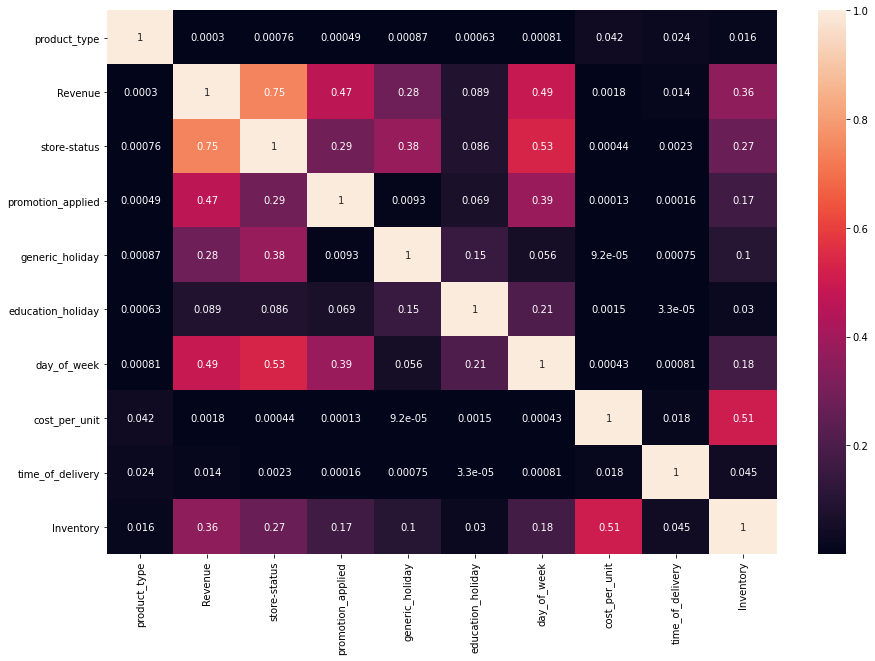

In [42]:
plt.subplots(figsize=(15,10))
correlationMatrix = data.corr().abs()
sns.heatmap(correlationMatrix,annot=True)
plt.show()

In [43]:
data.corr()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
product_type,1.000000,-0.000305,-0.000764,-0.000495,0.000871,0.000629,0.000809,-0.042202,-0.024367,0.016318
Revenue,-0.000305,1.000000,0.745994,0.468239,-0.282175,0.088688,-0.490002,0.001820,-0.013616,0.359116
store-status,-0.000764,0.745994,1.000000,0.292598,-0.378622,0.086257,-0.531705,-0.000436,-0.002287,0.270819
promotion_applied,-0.000495,0.468239,0.292598,1.000000,-0.009299,0.068608,-0.385019,0.000132,-0.000164,0.170544
generic_holiday,0.000871,-0.282175,-0.378622,-0.009299,1.000000,0.151696,-0.056453,0.000092,-0.000747,-0.102358
education_holiday,0.000629,0.088688,0.086257,0.068608,0.151696,1.000000,-0.206084,0.001475,-0.000033,0.030432
day_of_week,0.000809,-0.490002,-0.531705,-0.385019,-0.056453,-0.206084,1.000000,0.000434,0.000807,-0.177907
cost_per_unit,-0.042202,0.001820,-0.000436,0.000132,0.000092,0.001475,0.000434,1.000000,0.018236,-0.505906
time_of_delivery,-0.024367,-0.013616,-0.002287,-0.000164,-0.000747,-0.000033,0.000807,0.018236,1.000000,-0.044513
Inventory,0.016318,0.359116,0.270819,0.170544,-0.102358,0.030432,-0.177907,-0.505906,-0.044513,1.000000


Revenue and store status are also highly correlated(0.75) followed by promotion applied(0.46). 

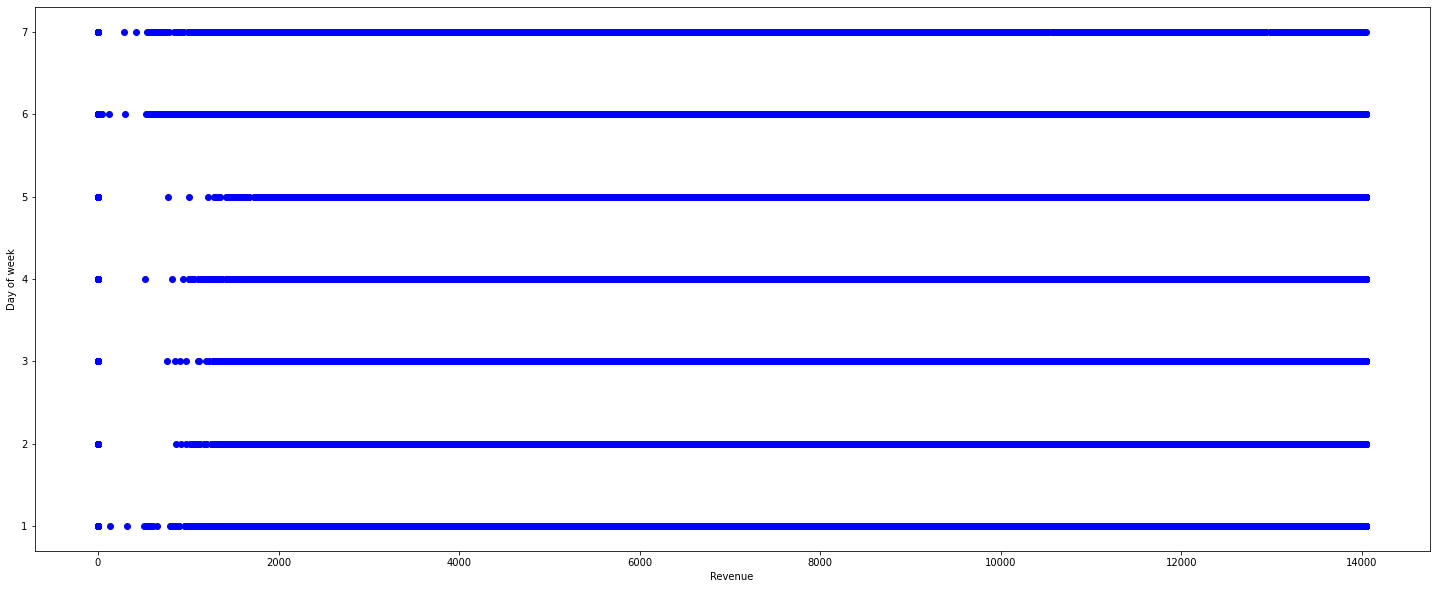

In [46]:
# SCATTER PLOT revenue vs Days of week

plt.figure(figsize=(25,10))
plt.plot(data.Revenue, data.day_of_week, "bo")
plt.xlabel("Revenue")
plt.ylabel("Day of week")
plt.show()

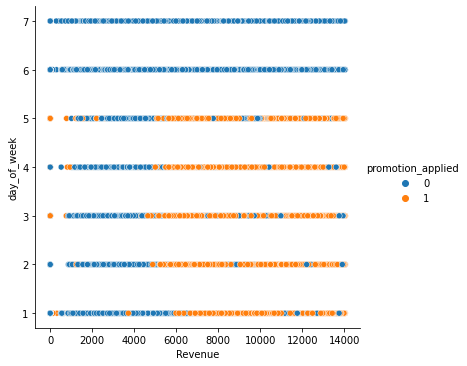

In [47]:
sns.relplot(x='Revenue',y='day_of_week', hue='promotion_applied',data=data)

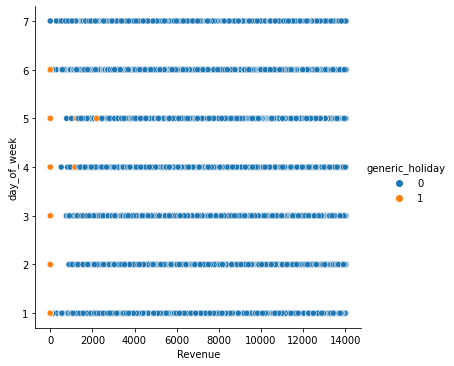

In [48]:
sns.relplot(x='Revenue',y='day_of_week', hue='generic_holiday',data=data)

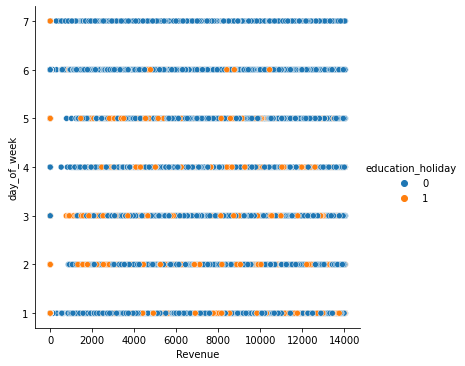

In [49]:
sns.relplot(x='Revenue',y='day_of_week', hue='education_holiday',data=data)

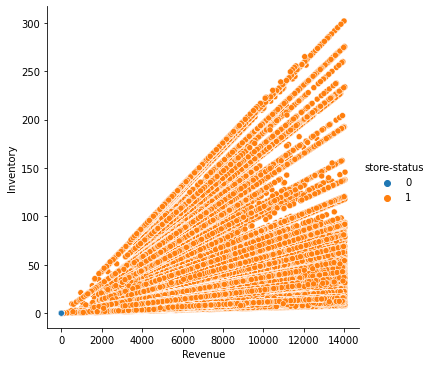

In [50]:
sns.relplot(x='Revenue',y='Inventory',hue='store-status',data=data)

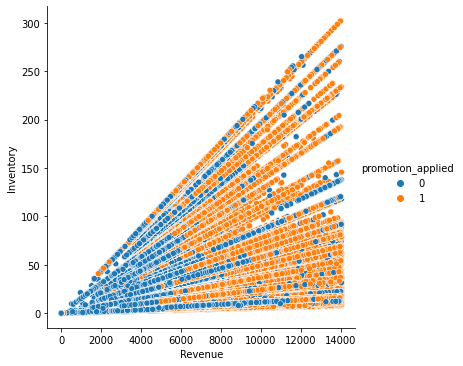

In [51]:
sns.relplot(x='Revenue',y='Inventory',hue='promotion_applied',data=data)

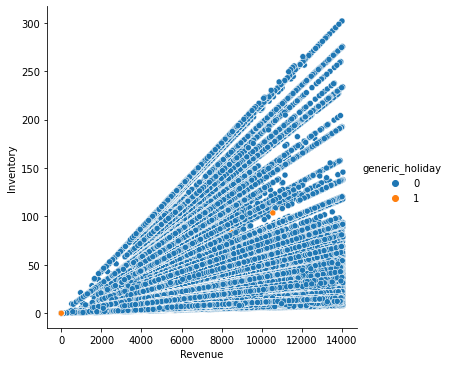

In [52]:
sns.relplot(x='Revenue',y='Inventory',hue='generic_holiday',data=data)

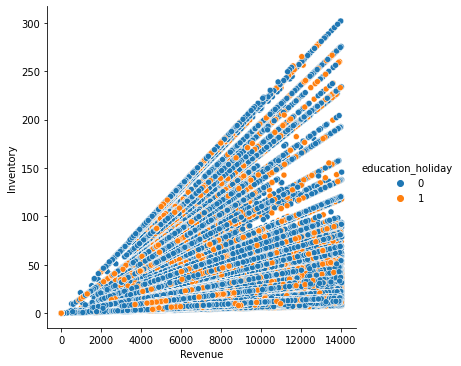

In [53]:
sns.relplot(x='Revenue',y='Inventory',hue='education_holiday',data=data)

In [54]:
print(data['Inventory'])

1          12.083151
2          11.510284
3          12.061488
4          14.687527
5           0.000000
             ...    
1017204    11.559692
1017205    11.000000
1017206    10.411233
1017207     8.957489
1017208     0.000000
Name: Inventory, Length: 990512, dtype: float64


In [55]:
weekly_data_Revenue = data.groupby('day_of_week').agg({'Revenue': ['min', 'max', 'sum','count', 'mean']})
print(weekly_data_Revenue)

            Revenue                                       
                min    max        sum   count         mean
day_of_week                                               
1                 0  14049  967074606  135281  7148.635847
2                 0  14049  941172495  141041  6673.041846
3                 0  14049  900976875  142502  6322.555999
4                 0  14045  859327853  142801  6017.659911
5                 0  14049  923327202  142512  6478.943542
6                 0  14047  802737114  142177  5646.040597
7                 0  14047   19063088  144198   132.200779


In [56]:
weekly_data_inventory = data.groupby('day_of_week').agg({'Inventory': ['min', 'max', 'sum','count', 'mean']})
print(weekly_data_inventory)

            Inventory                                             
                  min         max           sum   count       mean
day_of_week                                                       
1                 0.0  301.960784  2.020145e+06  135281  14.932957
2                 0.0  295.490196  1.967601e+06  141041  13.950560
3                 0.0  278.494118  1.878719e+06  142502  13.183811
4                 0.0  280.154902  1.793165e+06  142801  12.557088
5                 0.0  288.588235  1.925627e+06  142512  13.512036
6                 0.0  275.471429  1.685483e+06  142177  11.854824
7                 0.0   86.527820  3.528226e+04  144198   0.244679


In [57]:
data.head()

,product_type,Revenue,store-status,promotion_applied,generic_holiday,education_holiday,day_of_week,cost_per_unit,time_of_delivery,Inventory
1,1,5020,1,1,0,1,4,457,11,12.083151
2,1,4782,1,1,0,1,3,457,11,11.510284
3,1,5011,1,1,0,1,2,457,11,12.061488
4,1,6102,1,1,0,1,1,457,11,14.687527
5,1,0,0,0,0,0,7,457,11,0.000000


## EDA using Sweetviz library

In [ ]:
# pip install sweetviz


In [ ]:
import sweetviz

In [ ]:
df1=sweetviz.analyze(df)


In [ ]:
# showing Report
df1.show_html('Report.html')

### Total columns deleted for further process are No. of purchases, sales.
### Target column is Inventory
